# Econ 581
# Bill Polley
# Notes on Mathematical Economics

## Limits, Continuity, and Derivatives
This section of the course deals with some very important concepts in mathematical economics. Since the very definition of economics involves the study of choice under scarcity, the concept of optimization is really the heart of what economics is about. So we will spend a significant amount of time laying the groundwork for thinking about optimization and discussing applications from various areas of economics. Limits, continuity, and derivatives form the basis for the theory of optimization.

Many of you taking this class have already taken either ECON 381 or MATH 137 or an equivalent course at another university. As a result, some of this may seem like a review, but it doesn't hurt to see it again. Because most, if not all, of you should have seen this before, we will not go into great detail on the basics. Again, our main objective is to get to the point where we can tackle some really interesting problems in economics. The math here is a tool rather than an end unto itself. Hopefully seeing it done on the computer will make it "come alive" a bit more than simply seeing it on a chalkboard.

Our goal is to be able to handle a variety of optimization problems that commonly arise in economics. Optimization problems rely on the concept of the derivative. The definition of the derivative involves limits.  Thus, our study of optimization must begin with the concept of limits.

### Limits and Continuity
Computers generally do not illustrate concepts such as limits and continuity very well because computers operate in a mathematical environment that is discrete rather than continuous. Therefore, we will take a more traditional approach to these topics. Please have consult your preferred calculus or mathematical economics textbook. We will discuss in class.

### Derivatives
With the definitions of limits and continuity in hand, we are ready to examine the subject of the derivative.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
import ipywidgets as widgets
%matplotlib inline

def tangent_line(f,x,x0):
    y = f(x) 
    y0 = f(x0)
    return derivative(f,x0,dx=10**(-10)) * (x - x0) + y0

def secant_line(f,x,x0,x1):
    y=f(x)
    y0=f(x0)
    y1=f(x1)
    try:
        sec=((y1-y0)/(x1-x0))*(x-x0)+(y0)
    except:
        sec=tangent_line(f,x,x0)
    return sec

def econplot(x,series,x_min,x_max,y_min,y_max,chart_title,chart_x,chart_y):
    fig = plt.figure()
    fig.set_figheight(6)
    fig.set_figwidth(6)
    ax = fig.add_axes([0,0,1,1])
    ax.axis([x_min,x_max,y_min,y_max])
    if np.ndim(series)==1:
        ax.plot(x,series)
    else:
        for y in series:
            ax.plot(x,y)
    ax.set_xlabel(chart_x,size=16)     
    ax.set_ylabel(chart_y,size=16)    
    ax.set_title(chart_title,size=24)
    ax.tick_params(which='both',labelsize=16)
    return fig,ax

x=np.linspace(-3,0,100)
 
def g(x1):
    def v(x):
        return -(x**2)+8
    t=tangent_line(v,x,-1.5)
    s=secant_line(v,x,-1.5,x1)
    y=np.array([v(x),t,s])
    fig,ax=econplot(x,y,-3,0,0,10,'Illustration of the Derivative','x','y=f(x)')
    plt.show()

interactive_plot = widgets.interactive(
    g,
    x1=widgets.FloatSlider(value=0,min=-3,max=0,step=.1,description='x1')
)
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='x1', max=0.0, min=-3.0), Output()), _dom_classes=('w…

For now, do not focus on the details of the code unless you are already very comfortable with Python. The point of this illustration is to illustrate the idea of the derivative, not the code.

When you execute the code above, you can adjust the slider to move the secant line (green). The secant line is an approximation to the tangent line. The closer that $x_1$ is to $x_0$ (the point at which we have drawn the tangent line, $x_0 = -1.5$ here) the better the approximation. So the definition of the derivative is the limit:

$$\lim_{x_1 \to x_0} \frac{f(x_0)-f(x_1)}{x_0-x_1}$$.

Graphically, the tangent line (whose slope is the derivative of $f(x)$) is the limit of the secant lines as $x_1$ approaches $x_0$.

You should also be able to see that in numerical computations, the best we can do to calculate a derivative is to approximate it by essentially constructing a secant line with a very small difference between $x_1$ and $x_0$.

Recall from our first set of notes that we defined a simple function to make this calculation.

In [2]:
def deriv(f,x):
    h = 0.000000001
    return (f(x+h) - f(x))/h

We did this to illustrate how to very easily create a simple but useful function. The package SciPy actually has a very similar function, `derivative`. It also includes an argument for the step size. Reminiscent of calculus notation, that step size is called $dx$.

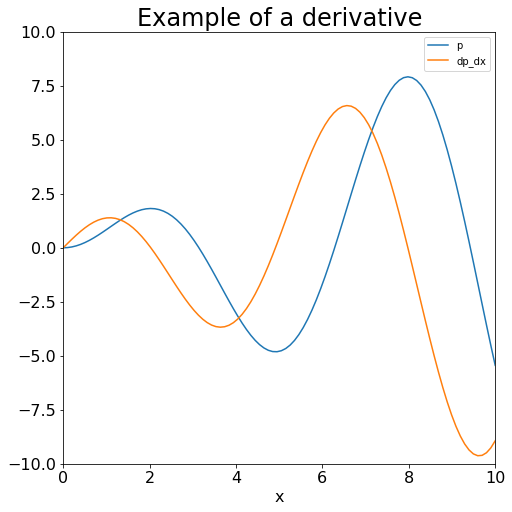

In [38]:
from scipy.misc import derivative
x=np.linspace(0,10,100)
def p(x):
    return x*np.sin(x)
def dp_dx(x):
    return derivative(p,x,dx=10**(-10))
y=np.array([p(x),dp_dx(x)])
fig,ax=econplot(x,y,0,10,-10,10,'Example of a derivative','x','')
ax.legend(['p','dp_dx'])
plt.show()

Question to consider (in class):  It was noted above that continuity is necessary but not sufficient for differentiability.  Can you write (or describe) a function that would be continuous but not differentiable?

In written mathematical expressions, the derivative is usually expressed as $\frac{d}{dx}$ (pronounced "dee, dee $x$") or alternatively as $f'(x)$ (pronounced "$f$-prime of $x$").  When the former notation is used to express the derivative of a function $y=f(x)$, we may write $\frac{dy}{dx}$ (pronounced "dee $y$, dee $x$") or $\frac{d}{dx}f(x)$  (pronounced "the derivative of $f$ with respect to $x$").

If we have a multivariate function, we express a partial derivative as $\frac{\partial y}{\partial x}$ (usually read as "partial of $y$ with respect to $x$"). This is obtained by differentiating with respect to $x$ and holding all other variables constant. I will say more about this topic in class. We will make frequent use of partial derivatives.

There is also something called total differentiation or total derivatives. We will take up that topic in the section on comparative statics.

In class, we will cover the following topics from calculus. Please refer to your preferred calculus or mathematical economics text.

Power function rule for derivatives, sum-difference rule, product rule, quotient rule, and the chain rule.